Hanna Olsson 
Johan Östling


# Imports

In [4]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image, ImageDraw
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



**Mount to drive**

# Introduction

In [39]:
data_gen = ImageDataGenerator(rescale=1.0/255)
#?usp=share_link
imgdir = r'\Users\johan\OneDrive\Dokument\GitHub\PA5\a5_images' # or wherever you put them...
img_size = 64
batch_size = 32


train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [6]:
Xbatch, Ybatch = train_generator.next()

In [6]:
Xbatch.shape

(32, 64, 64, 3)

0.0

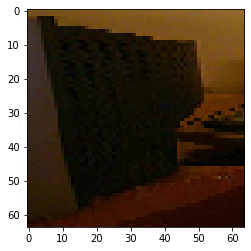

In [13]:
plt.imshow(Xbatch[5]);
Ybatch[5]

# Part 1: Training a convolutional neural network

In [43]:
def make_convet(train, validation):
    model = Sequential()

    #before sending each pixel to the "ordinary" NN, we use convulational layers to shrink the feature map

    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3))) #We use 16 3x3 filters with the activation function 'relu'.

    model.add(MaxPooling2D(pool_size=(2, 2))) #this goes though 2x2 non-overlapping pixels in the feature map after the filtering a chooses the maximum value.

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    #add the fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #sigmoid for binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

    history = model.fit(train,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation,
    validation_steps=8)

    return history


In [44]:
history = make_convet(train_generator, validation_generator)

Epoch 1/15
8/8 [==============================] - 2s 166ms/step - loss: 0.7919 - accuracy: 0.5117 - val_loss: 0.7453 - val_accuracy: 0.4766
Epoch 2/15
8/8 [==============================] - 1s 128ms/step - loss: 0.6833 - accuracy: 0.5508 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 1s 128ms/step - loss: 0.6916 - accuracy: 0.5312 - val_loss: 0.7065 - val_accuracy: 0.4727
Epoch 4/15
8/8 [==============================] - 1s 128ms/step - loss: 0.6911 - accuracy: 0.4961 - val_loss: 0.6784 - val_accuracy: 0.5977
Epoch 5/15
8/8 [==============================] - 1s 127ms/step - loss: 0.6707 - accuracy: 0.5938 - val_loss: 0.6744 - val_accuracy: 0.5547
Epoch 6/15
8/8 [==============================] - 1s 130ms/step - loss: 0.6532 - accuracy: 0.6172 - val_loss: 0.6425 - val_accuracy: 0.6680
Epoch 7/15
8/8 [==============================] - 1s 129ms/step - loss: 0.6230 - accuracy: 0.7109 - val_loss: 0.6169 - val_accuracy: 0.6719
Epoch 8/15
8/8 [====

Plot of the training and validation loss for each epoch

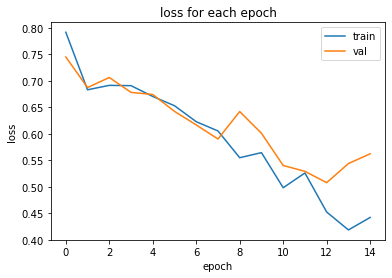

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss for each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Plot of the training and validation accuracies for each epoch

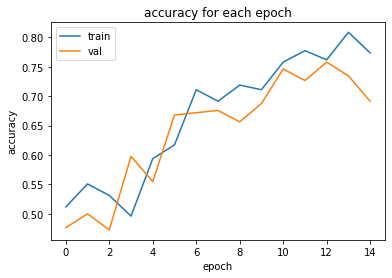

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Part 2: Data augmentation

In [47]:
data_gen_augmented = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=5,  # Randomly rotate images within the range of 10 degrees
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=(0.9, 1.1),  # Randomly adjust brightness between 0.8 and 1.2
    channel_shift_range=5,  # Randomly shift colors within the range of 50
)

train_generator_augmented = data_gen_augmented.flow_from_directory(
    imgdir + '/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    classes=['other', 'car'],
    seed=12345,
    shuffle=True
)



Found 1600 images belonging to 2 classes.


In [48]:
history_aug = make_convet(train_generator_augmented, validation_generator)

Epoch 1/15
8/8 [==============================] - 2s 200ms/step - loss: 0.8582 - accuracy: 0.4961 - val_loss: 0.7223 - val_accuracy: 0.4961
Epoch 2/15
8/8 [==============================] - 1s 165ms/step - loss: 0.7002 - accuracy: 0.5312 - val_loss: 0.6825 - val_accuracy: 0.5430
Epoch 3/15
8/8 [==============================] - 1s 169ms/step - loss: 0.6520 - accuracy: 0.5703 - val_loss: 0.6971 - val_accuracy: 0.5391
Epoch 4/15
8/8 [==============================] - 1s 175ms/step - loss: 0.6764 - accuracy: 0.5938 - val_loss: 0.6332 - val_accuracy: 0.7109
Epoch 5/15
8/8 [==============================] - 1s 170ms/step - loss: 0.6340 - accuracy: 0.6680 - val_loss: 0.6440 - val_accuracy: 0.6406
Epoch 6/15
8/8 [==============================] - 1s 165ms/step - loss: 0.6166 - accuracy: 0.6719 - val_loss: 0.6189 - val_accuracy: 0.6914
Epoch 7/15
8/8 [==============================] - 1s 176ms/step - loss: 0.5765 - accuracy: 0.7188 - val_loss: 0.6062 - val_accuracy: 0.6680
Epoch 8/15
8/8 [====

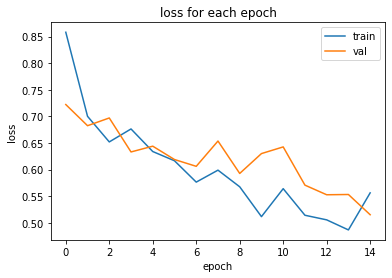

In [49]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('loss for each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

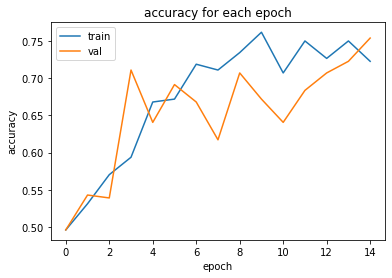

In [50]:
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Do we see any improvements on the validation set? (overfitting compared to Part 1) Is there a tradeoff between underfitting and overfitting when playing around with data augmentation?

**Interlude: Applying a pre-trained convolutional neural network**

# Part 3: Using VGG-16 as a feature extractor

# Part 4: Visualizing the learned features